# Setup & Utils

In [ ]:
!pip install --quiet reportlab
!pip install --quiet matplotlib pandas

In [44]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle, PageBreak
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib import colors
from reportlab.lib.units import inch
from reportlab.platypus import ListFlowable, ListItem
from reportlab.lib.pagesizes import letter, landscape
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import pandas as pd
import numpy as np
import os
import io

np.random.seed(42)

# Config

In [69]:
OUTPUT_PATH = "./Social_Media_Sentiment_Report.pdf"

NAVY = "#346699"
GRAY = "#808080"
MINT = "#3EB489"

# Utils

In [67]:
def kpi_card(value, value_color=NAVY, big_label=None, small_label=None):
	fig, ax = plt.subplots(figsize=(4, 2.5))
	ax.axis('off')

	# Card background
	ax.add_patch(
		Rectangle(
			(0, 0), 1, 1,
			transform=ax.transAxes,
			facecolor="#F2F2F2",   # background fill
		)
	)

	# Big Label
	if big_label:
		ax.text(
			0.025, 0.9, 
			transform=ax.transAxes,
			s=big_label,
			fontsize=12,
			fontweight='bold',
			color=NAVY
		)

	# Small Label
	if small_label:
		ax.text(
			0.025, 0.78, 
			transform=ax.transAxes,
			s=small_label,
			fontsize=12,
			color=GRAY
		)
	
	# Main value
	ax.text(
		0.5, 0.375,
		transform=ax.transAxes,
		s=value,
		ha='center', 
		va='center',
		fontsize=36,
		fontweight='bold',
		color=value_color
	)

	return fig

# Get Data

In [ ]:
# Hardcode dummy data
data = []
for _ in range(600):
	data.append([
		np.random.choice(pd.date_range("2026-01-01", periods=30)),
		np.random.choice(["twitter", "instagram", "youtube"]),
		np.random.choice(["positive", "neutral", "negative"], p=[0.55, 0.30, 0.15]),
		"Sample post content",
		"https://example.com/post",
		np.random.choice([f"trend_{i}" for i in range(1, 501)])
	])

df = pd.DataFrame(
	data,
	columns=["DATE", "SOURCE", "SENTIMENT", "POST", "LINK", "TREND"]
)

df.head()

,DATE,SOURCE,SENTIMENT,POST,LINK,TREND
0,2026-01-07,twitter,positive,Sample post content,https://example.com/post,trend_72
1,2026-01-29,twitter,positive,Sample post content,https://example.com/post,trend_467
2,2026-01-23,youtube,positive,Sample post content,https://example.com/post,trend_373
3,2026-01-04,youtube,positive,Sample post content,https://example.com/post,trend_258
4,2026-01-24,instagram,positive,Sample post content,https://example.com/post,trend_192


# Create Separate Elements

In [4]:
elements_buffer = []

## "Total Mention" Card

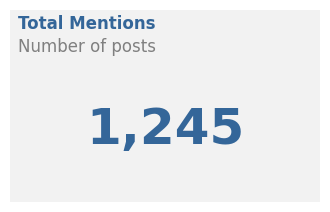

In [68]:
fig = kpi_card("1,245", big_label="Total Mentions", small_label="Number of posts")
plt.show()

## "Daily Percentage" Card

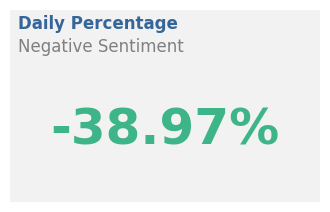

In [70]:
fig = kpi_card("-38.97%", value_color=MINT, big_label="Daily Percentage", small_label="Negative Sentiment")

## "Weekly Percentage" Card

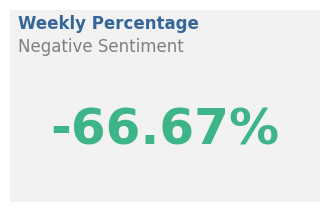

In [ ]:
fig = kpi_card("-66.67%", value_color=MINT, big_label="Weekly Percentage", small_label="Negative Sentiment")

## "Sentiment Shared" Donut

## "Daily Sentiment Movement" Line

## "Platform Distribution" Stacked Bar

## "Trend Analysis" Stacked Bar with Line

## "Insight" GenAI

# Build Report

In [ ]:
doc = SimpleDocTemplate(
	OUTPUT_PATH,
	pagesize=landscape(letter)
)

styles = getSampleStyleSheet()

In [ ]:
# TODO: arrange into layout

In [ ]:
doc.build(elements)
print("Report has been generated.")